In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
sents=pd.read_csv('sentiment_score_new.csv',parse_dates=['date'],index_col='date')

In [4]:
aapl_stock=pd.read_csv('stocks.csv',parse_dates=['date'],index_col='date')

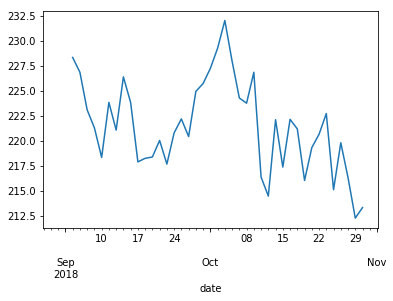

In [5]:
aapl_stock.Close.resample('B').mean().plot()

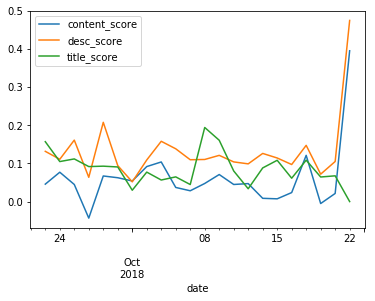

In [6]:
sents.resample('B').mean().plot()

In [7]:
sents.index.min(),aapl_stock.index.min()

(Timestamp('2018-09-22 00:00:00'), Timestamp('2018-08-31 00:00:00'))

In [8]:
sents.index.max(),aapl_stock.index.max()

(Timestamp('2018-10-22 00:00:00'), Timestamp('2018-10-30 00:00:00'))

In [14]:
sent_data=sents.groupby(sents.index).mean()

In [16]:
sent_data

,content_score,desc_score,title_score
date,,,
2018-09-22,-0.021552,0.139173,0.084003
2018-09-23,0.118587,0.123728,0.236237
2018-09-24,0.076981,0.110943,0.104930
2018-09-25,0.044822,0.161199,0.111867
2018-09-26,-0.043366,0.063646,0.091782
2018-09-27,0.067147,0.207833,0.092848
2018-09-28,0.061063,0.112903,0.112483
2018-09-29,0.019479,0.062670,-0.028399
2018-09-30,0.124802,0.027083,0.115104


In [23]:
sent_data.shape,aapl_stock.shape

((31, 3), (42, 6))

In [19]:
sent_data.describe

<bound method NDFrame.describe of             content_score  desc_score  title_score
date                                              
2018-09-22      -0.021552    0.139173     0.084003
2018-09-23       0.118587    0.123728     0.236237
2018-09-24       0.076981    0.110943     0.104930
2018-09-25       0.044822    0.161199     0.111867
2018-09-26      -0.043366    0.063646     0.091782
2018-09-27       0.067147    0.207833     0.092848
2018-09-28       0.061063    0.112903     0.112483
2018-09-29       0.019479    0.062670    -0.028399
2018-09-30       0.124802    0.027083     0.115104
2018-10-01       0.053996    0.051756     0.029758
2018-10-02       0.091796    0.109139     0.077273
2018-10-03       0.103879    0.158083     0.056533
2018-10-04       0.037060    0.138439     0.064772
2018-10-05       0.028122    0.093663     0.052331
2018-10-06      -0.006920    0.131841     0.095579
2018-10-07       0.064182    0.129865    -0.026211
2018-10-08       0.047460    0.110403     0.1943

In [21]:
sent_data.std(),sent_data.mean()

(content_score    0.083491
 desc_score       0.075471
 title_score      0.065376
 dtype: float64, content_score    0.051820
 desc_score       0.123526
 title_score      0.081852
 dtype: float64)

In [22]:
aapl_stock.std(),aapl_stock.mean()

(Open         4.498319e+00
 High         3.854798e+00
 Low          4.983535e+00
 Close        4.653643e+00
 Adj Close    4.637462e+00
 Volume       1.224659e+07
 dtype: float64, Open         2.219410e+02
 High         2.244081e+02
 Low          2.190945e+02
 Close        2.216100e+02
 Adj Close    2.208395e+02
 Volume       3.508814e+07
 dtype: float64)

In [33]:
final_df=pd.merge(sent_data,aapl_stock,how='inner',on='date')

In [34]:
final_df

,content_score,desc_score,title_score,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,,,
2018-09-24,0.076981,0.110943,0.104930,216.820007,221.259995,216.630005,220.789993,220.022293,27693400
2018-09-25,0.044822,0.161199,0.111867,219.750000,222.820007,219.699997,222.190002,221.417435,24554400
2018-09-26,-0.043366,0.063646,0.091782,221.000000,223.750000,219.759995,220.419998,219.653595,23984700
2018-09-27,0.067147,0.207833,0.092848,223.820007,226.440002,223.539993,224.949997,224.167831,30181200
2018-09-28,0.061063,0.112903,0.112483,224.789993,225.839996,224.020004,225.740005,224.955093,22929400
2018-10-01,0.053996,0.051756,0.029758,227.949997,229.419998,226.350006,227.259995,226.469803,23600800
2018-10-02,0.091796,0.109139,0.077273,227.250000,230.000000,226.630005,229.279999,228.482788,24788200
2018-10-03,0.103879,0.158083,0.056533,230.050003,233.470001,229.779999,232.070007,231.263092,28654800
2018-10-04,0.037060,0.138439,0.064772,230.779999,232.350006,226.729996,227.990005,227.197281,32042000


In [36]:
final_df['change_close']=final_df['Close']-final_df['Close'].shift(1)

In [37]:
final_df

,content_score,desc_score,title_score,Open,High,Low,Close,Adj Close,Volume,change_close
date,,,,,,,,,,
2018-09-24,0.076981,0.110943,0.104930,216.820007,221.259995,216.630005,220.789993,220.022293,27693400,NaN
2018-09-25,0.044822,0.161199,0.111867,219.750000,222.820007,219.699997,222.190002,221.417435,24554400,1.400009
2018-09-26,-0.043366,0.063646,0.091782,221.000000,223.750000,219.759995,220.419998,219.653595,23984700,-1.770004
2018-09-27,0.067147,0.207833,0.092848,223.820007,226.440002,223.539993,224.949997,224.167831,30181200,4.529999
2018-09-28,0.061063,0.112903,0.112483,224.789993,225.839996,224.020004,225.740005,224.955093,22929400,0.790008
2018-10-01,0.053996,0.051756,0.029758,227.949997,229.419998,226.350006,227.259995,226.469803,23600800,1.519990
2018-10-02,0.091796,0.109139,0.077273,227.250000,230.000000,226.630005,229.279999,228.482788,24788200,2.020004
2018-10-03,0.103879,0.158083,0.056533,230.050003,233.470001,229.779999,232.070007,231.263092,28654800,2.790008
2018-10-04,0.037060,0.138439,0.064772,230.779999,232.350006,226.729996,227.990005,227.197281,32042000,-4.080002


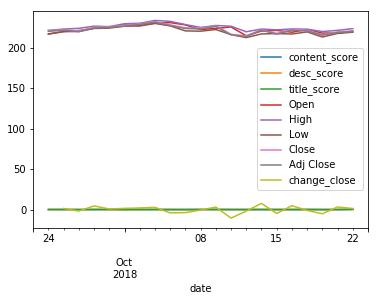

In [45]:
final_df.drop(['Volume'],axis=1).plot()

In [48]:
final_df.to_csv('final.csv')

In [49]:
final_df.describe()

,content_score,desc_score,title_score,Open,High,Low,Close,Adj Close,Volume,change_close
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,20.000000
mean,0.063070,0.132720,0.085494,222.596191,225.065716,220.196190,222.629523,221.855432,3.053951e+07,-0.007000
std,0.084811,0.085903,0.043596,4.459958,3.941334,4.635369,4.605762,4.589748,7.302936e+06,4.225170
min,-0.043366,0.051756,0.000000,214.520004,219.500000,212.320007,214.449997,213.704346,2.288540e+07,-10.509994
25%,0.028122,0.098919,0.061312,219.750000,222.639999,216.839996,220.419998,219.653595,2.478820e+07,-2.357506
50%,0.047164,0.110943,0.080283,222.210007,223.750000,219.699997,222.149994,221.377563,2.918400e+07,1.065002
75%,0.070922,0.138439,0.108555,225.460007,227.270004,223.539993,225.740005,224.955093,3.258130e+07,2.867504
max,0.395455,0.475000,0.194308,230.779999,233.470001,229.779999,232.070007,231.263092,5.312440e+07,7.660004


In [50]:
from scipy.stats.stats import pearsonr   


In [56]:
cols=list(final_df)[:3]
cols

['content_score', 'desc_score', 'title_score']

In [61]:
def get_coor(lrow):
    return pearsonr(lrow['content_score'],lrow['change_close'])[0]


In [66]:
final_df.dropna(axis=1)
final_df[1:,].apply(get_coor,axis=1)

TypeError: unhashable type: 'slice'